In [2]:
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir)
from importlib import reload

import pandas as pd
import numpy as np
from pymongo import MongoClient
import matplotlib.pyplot as plt
import plot_package as pp
reload(pp)

mongo_url = 'mongodb://10.160.1.15:27017'
db_name = 'IgHashtag'
col_detail = 'detailed_posts'
col_posts = 'posts'

client_posts = MongoClient(mongo_url)[db_name][col_detail]
client_detail= MongoClient(mongo_url)[db_name][col_detail]
cur_posts = client_posts.find({})
cur_detail = client_detail.find({})

In [3]:
df_posts= pd.DataFrame(cur_posts)
df_detail = pd.DataFrame(cur_detail)

# General

In [4]:
print('df_posts')
print(f'{df_posts.describe()}\n')
print(df_posts.info())
print('##########################')
print('df_detail')
print(f'{df_detail.describe()}\n')
print(df_detail.info())

df_posts
       comments_count  followers_count  following_count   likes_count
count    78451.000000     7.845100e+04     78451.000000  78451.000000
mean         3.087418     6.301226e+03       867.916649    128.175205
std         39.489795     3.115038e+04      1594.537449    722.942897
min          0.000000     0.000000e+00         0.000000      0.000000
25%          0.000000     1.580000e+02        56.000000     10.000000
50%          0.000000     5.540000e+02       235.000000     23.000000
75%          1.000000     1.799000e+03       744.000000     54.000000
max       7087.000000     1.395609e+06      7516.000000  57760.000000

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78451 entries, 0 to 78450
Data columns (total 19 columns):
_id                      78451 non-null object
accessibility_caption    3744 non-null object
biography                78451 non-null object
comments                 36 non-null object
comments_count           78451 non-null int64
commetns             

# POSTS

In [14]:
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']

Text(0.5, 1.0, 'Followers count distribution')

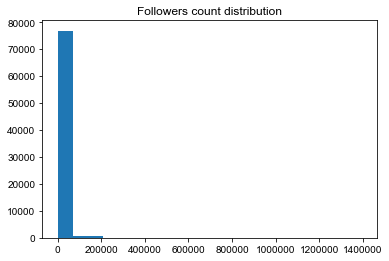

In [77]:
plt.hist(df_posts.sort_values('followers_count')['followers_count'],bins=20)
# plt.ylim([0,100])
plt.title('Followers count distribution')

Text(0.5, 1.0, 'Comments count distribution')

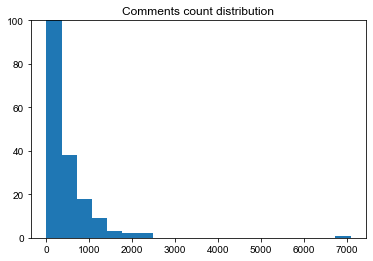

In [79]:
plt.hist(df_posts.sort_values('comments_count')['comments_count'],bins=20)
plt.ylim([0,100])
plt.title('Comments count distribution')

Text(0, 0.5, 'Count')

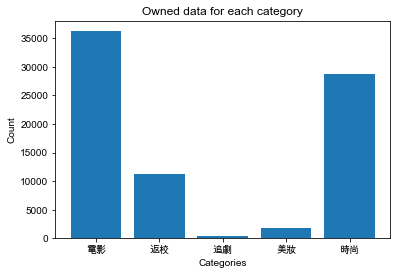

In [75]:
value = df_posts.groupby('hashtag').count()['_id']
plt.bar(df_posts['hashtag'].unique(),value)
plt.title('Owned data for each category')
plt.xlabel('Categories')
plt.ylabel('Count')
# plt.ylim([0,1000])

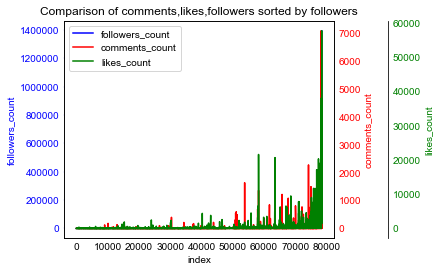

In [47]:
value =df_posts[['comments_count','likes_count','followers_count']].sort_values('followers_count').reset_index(drop=True)
x_ticks = value.index
pp.plot_multi(x_ticks,value['comments_count'],
              x_ticks,value['likes_count'],
              x_ticks,value['followers_count'],
              'index',
              'comments_count','likes_count','followers_count',
              'Comparison of comments,likes,followers sorted by followers'
              
             )

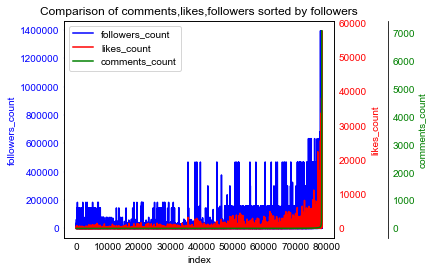

In [48]:
value =df_posts[['comments_count','likes_count','followers_count']].sort_values('comments_count').reset_index(drop=True)
x_ticks = value.index
pp.plot_multi(x_ticks,value['followers_count'],
              x_ticks,value['likes_count'],
              x_ticks,value['comments_count'],
              'index',
              'followers_count','likes_count','comments_count',
              'Comparison of comments,likes,followers sorted by followers'
              
             )

In [61]:
df_posts[df_posts['followers_count']>500000]

_id accessibility_caption  \
387    5d49025677f584ff6d041c83                   NaN   
652    5d49038977f584ff6d04493d                   NaN   
2292   5d49088b77f584ff6d04ef95                   NaN   
4976   5d4911fd77f584ff6d06082f                   NaN   
11606  5d49282d77f584ff6d08b3b9                   NaN   
12484  5d492b4077f584ff6d08febc                   NaN   
13268  5d492dd477f584ff6d0959d8                   NaN   
15761  5d49361a77f584ff6d0a5a2f                   NaN   
15817  5d49364e77f584ff6d0a5e83                   NaN   
16065  5d49373777f584ff6d0a8076                   NaN   
17300  5d493bdb77f584ff6d0b0b90                   NaN   
18907  5d4941fb77f584ff6d0bbc5c                   NaN   
19850  5d4945b677f584ff6d0c3327                   NaN   
19902  5d4945ea77f584ff6d0c35e4                   NaN   
19924  5d49460577f584ff6d0c37e3                   NaN   
22025  5d494dc777f584ff6d0d2749                   NaN   
22606  5d494ff377f584ff6d0d67e5                   NaN   
24040  5d49554177f584ff6d0e04af                   NaN   
25116  5d49592777f584ff6d0e749c                   NaN   
25763  5d495b8d77f584ff6d0ecae4                   NaN   
26560  5d495e7977f584ff6d0f1fca                   NaN   
34561  5d497c6777f584ff6d1299d8                   NaN   
35831  5d49813877f584ff6d131968                   NaN   
39277  5d498e4877f584ff6d14a3d8                   NaN   
39935  5d49910c77f584ff6d150401                   NaN   
40631  5d4993c977f584ff6d1545fe                   NaN   
41464  5d49970a77f584ff6d15b1bc                   NaN   
41718  5d49980977f584ff6d15be37                   NaN   
42061  5d49996677f584ff6d15ebb4                   NaN   
42285  5d499a3b77f584ff6d161978                   NaN   
42375  5d499a9277f584ff6d162982                   NaN   

                                               biography comments  \
387    ÊâÄÊúâÁ∂≤Ë∑ØÁï∂Á¥ÖË©±È°åÁöÑÂ§ßÂπ≥Âè∞ÔºÅüëç\nÈÄèÈÅéÂ§ßÈáèÁ§æÁæ§ÊõùÂÖâËÆìÁÜ±ÈñÄÂÖßÂÆπË¢´ÂÖ®‰∏ñÁïåÁúãÂà∞\nFBüîéÂè∞ÁÅ£ÈÅî‰∫∫ÁßÄ ...      NaN   
652    Hong Kong Actor \nÂ∑•‰ΩúÊé•Ê¥ΩÔºöSyllina Tong (852-90297...      NaN   
2292   ÊâÄÊúâÁ∂≤Ë∑ØÁï∂Á¥ÖË©±È°åÁöÑÂ§ßÂπ≥Âè∞ÔºÅüëç\nÈÄèÈÅéÂ§ßÈáèÁ§æÁæ§ÊõùÂÖâËÆìÁÜ±ÈñÄÂÖßÂÆπË¢´ÂÖ®‰∏ñÁïåÁúãÂà∞\nFBüîéÂè∞ÁÅ£ÈÅî‰∫∫ÁßÄ ...      NaN   
4976   ÊâÄÊúâÁ∂≤Ë∑ØÁï∂Á¥ÖË©±È°åÁöÑÂ§ßÂπ≥Âè∞ÔºÅüëç\nÈÄèÈÅéÂ§ßÈáèÁ§æÁæ§ÊõùÂÖâËÆìÁÜ±ÈñÄÂÖßÂÆπË¢´ÂÖ®‰∏ñÁïåÁúãÂà∞\nFBüîéÂè∞ÁÅ£ÈÅî‰∫∫ÁßÄ ...      NaN   
11606  ÊâÄÊúâÁ∂≤Ë∑ØÁï∂Á¥ÖË©±È°åÁöÑÂ§ßÂπ≥Âè∞ÔºÅüëç\nÈÄèÈÅéÂ§ßÈáèÁ§æÁæ§ÊõùÂÖâËÆìÁÜ±ÈñÄÂÖßÂÆπË¢´ÂÖ®‰∏ñÁïåÁúãÂà∞\nFBüîéÂè∞ÁÅ£ÈÅî‰∫∫ÁßÄ ...      NaN   
12484  ÊâÄÊúâÁ∂≤Ë∑ØÁï∂Á¥ÖË©±È°åÁöÑÂ§ßÂπ≥Âè∞ÔºÅüëç\nÈÄèÈÅéÂ§ßÈáèÁ§æÁæ§ÊõùÂÖâËÆìÁÜ±ÈñÄÂÖßÂÆπË¢´ÂÖ®‰∏ñÁïåÁúãÂà∞\nFBüîéÂè∞ÁÅ£ÈÅî‰∫∫ÁßÄ ...      NaN   
13268  ÊâÄÊúâÁ∂≤Ë∑ØÁï∂Á¥ÖË©±È°åÁöÑÂ§ßÂπ≥Âè∞ÔºÅüëç\nÈÄèÈÅéÂ§ßÈáèÁ§æÁæ§ÊõùÂÖâËÆìÁÜ±ÈñÄÂÖßÂÆπË¢´ÂÖ®‰∏ñÁïåÁúãÂà∞\nFBüîéÂè∞ÁÅ£ÈÅî‰∫∫ÁßÄ ...      NaN   
15761  ÊâÄÊúâÁ∂≤Ë∑ØÁï∂Á¥ÖË©±È°åÁöÑÂ§ßÂπ≥Âè∞ÔºÅüëç\nÈÄèÈÅéÂ§ßÈáèÁ§æÁæ§ÊõùÂÖâËÆìÁÜ±ÈñÄÂÖßÂÆπË¢´ÂÖ®‰∏ñÁïåÁúãÂà∞\nFBüîéÂè∞ÁÅ£ÈÅî‰∫∫ÁßÄ ...      NaN   
15817  ÊâÄÊúâÁ∂≤Ë∑ØÁï∂Á¥ÖË©±È°åÁöÑÂ§ßÂπ≥Âè∞ÔºÅüëç\nÈÄèÈÅéÂ§ßÈáèÁ§æÁæ§ÊõùÂÖâËÆìÁÜ±ÈñÄÂÖßÂÆπË¢´ÂÖ®‰∏ñÁïåÁúãÂà∞\nFBüîéÂè∞ÁÅ£ÈÅî‰∫∫ÁßÄ ...      NaN   
16065  ÊâÄÊúâÁ∂≤Ë∑ØÁï∂Á¥ÖË©±È°åÁöÑÂ§ßÂπ≥Âè∞ÔºÅüëç\nÈÄèÈÅéÂ§ßÈáèÁ§æÁæ§ÊõùÂÖâËÆìÁÜ±ÈñÄÂÖßÂÆπË¢´ÂÖ®‰∏ñÁïåÁúãÂà∞\nFBüîéÂè∞ÁÅ£ÈÅî‰∫∫ÁßÄ ...      NaN   
17300  Hong Kong Actor \nÂ∑•‰ΩúÊé•Ê¥ΩÔºöSyllina Tong (852-90297...      NaN   
18907  ÊâÄÊúâÁ∂≤Ë∑ØÁï∂Á¥ÖË©±È°åÁöÑÂ§ßÂπ≥Âè∞ÔºÅüëç\nÈÄèÈÅéÂ§ßÈáèÁ§æÁæ§ÊõùÂÖâËÆìÁÜ±ÈñÄÂÖßÂÆπË¢´ÂÖ®‰∏ñÁïåÁúãÂà∞\nFBüîéÂè∞ÁÅ£ÈÅî‰∫∫ÁßÄ ...      NaN   
19850  ÊúâÈóúÂ∑•‰ΩúÊü•Ë©¢Ë´ãËÅØÁµ° Ms. Daisy Shiu \nEmail: daisy.shiu@t...      NaN   
19902  ÊâÄÊúâÁ∂≤Ë∑ØÁï∂Á¥ÖË©±È°åÁöÑÂ§ßÂπ≥Âè∞ÔºÅüëç\nÈÄèÈÅéÂ§ßÈáèÁ§æÁæ§ÊõùÂÖâËÆìÁÜ±ÈñÄÂÖßÂÆπË¢´ÂÖ®‰∏ñÁïåÁúãÂà∞\nFBüîéÂè∞ÁÅ£ÈÅî‰∫∫ÁßÄ ...      NaN   
19924  „ÄåÂ§ßÂÆ∂Â•ΩÔºÅÊàëÂÄëÊòØÈÄôÁæ§‰∫∫ÔºÅ„Äç\n15„ÄÅ30ËôüÊñºYoutubeÁôºË°®\nÂúòÈï∑ @keelongxu...      NaN   
22025  ÊâÄÊúâÁ∂≤Ë∑ØÁï∂Á¥ÖË©±È°åÁöÑÂ§ßÂπ≥Âè∞ÔºÅüëç\nÈÄèÈÅéÂ§ßÈáèÁ§æÁæ§ÊõùÂÖâËÆìÁÜ±ÈñÄÂÖßÂÆπË¢´ÂÖ®‰∏ñÁïåÁúãÂà∞\nFBüîéÂè∞ÁÅ£ÈÅî‰∫∫ÁßÄ ...     